In [1]:
from src import error_plot, auto_pca, auto_pca_cont
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
condition = ['Day1', 'Day2', 'Day3']
np.repeat(condition, 5)

array(['Day1', 'Day1', 'Day1', 'Day1', 'Day1', 'Day2', 'Day2', 'Day2',
       'Day2', 'Day2', 'Day3', 'Day3', 'Day3', 'Day3', 'Day3'],
      dtype='<U4')

In [3]:
len(condition)

3

In [4]:
np.linspace(1,5,5).astype(int)

array([1, 2, 3, 4, 5])

In [5]:
def gen_data_classification(conditions, n_per_condition, n_variables, p_important = 0.3):
    replicate = np.tile(np.linspace(1,n_per_condition,n_per_condition).astype(int), len(conditions))
    conditions_rep = np.repeat(conditions, n_per_condition)
    data = pd.DataFrame({'Cond':conditions_rep, 'Rep':replicate})
    for i in range(n_variables):
        var_key = f'Var_{i + 1}'
        of_sett = 10 + np.random.random() * 7
        data[var_key] = np.random.randn(len(conditions_rep)) + of_sett
        if np.random.random() < p_important:
            for j in conditions:
                of_sett_sample = np.random.random() * 7
                data.loc[data['Cond'] == j, var_key] = data[data['Cond'] == j][var_key] + of_sett_sample
            print(var_key)
    return data.copy()

In [6]:
def gen_data_regression(variable_range, n_sample_total, n_variables, p_important = 0.3):
    dep_variable = variable_range[0] + np.random.random(n_sample_total) * (variable_range[1] - variable_range[0])
    data = pd.DataFrame({'dep_variable': dep_variable})
    for i in range(n_variables):
        var_key = f'Var_{i + 1}'
        of_sett = 10 + np.random.random() * 7
        data[var_key] = np.random.randn(n_sample_total) + of_sett
        if np.random.random() < p_important:
            print(var_key)
            slope = np.random.randn() * 4
            data[var_key] = data[var_key] + data['dep_variable'] * slope

    return data.copy()

In [7]:
data_reg = gen_data_regression((0,1), 40, 10)

Var_3
Var_7


In [8]:
data_class = gen_data_classification(['Day1', 'Day2', 'Day3', 'Day4'], 10, 10)

Var_3
Var_7
Var_9
Var_10


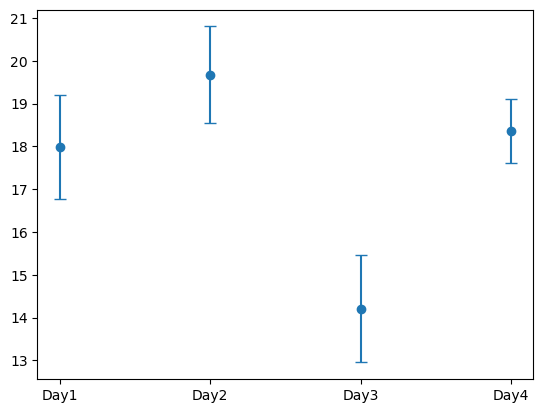

In [9]:
error_plot.error_plot(data_class,'Cond', 'Var_3')

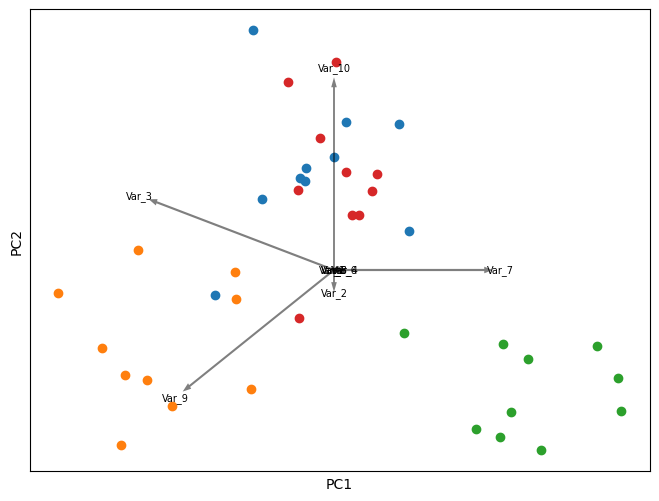

In [10]:
pca = auto_pca.AutoPCA(data_class.drop('Rep', axis=1),['Cond'], scale=False, sparse=True)
pca.biplot()
plt.show()

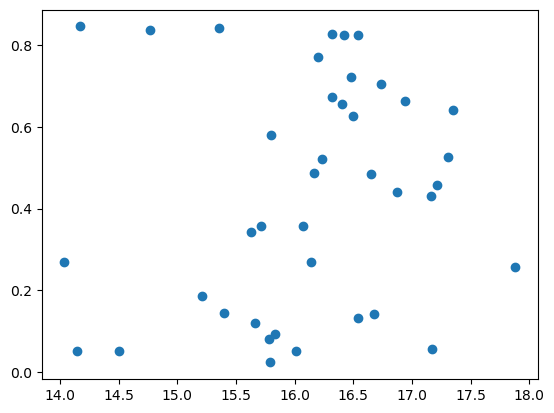

In [11]:
plt.scatter(data_reg['Var_4'], data_reg['dep_variable'])
plt.show()

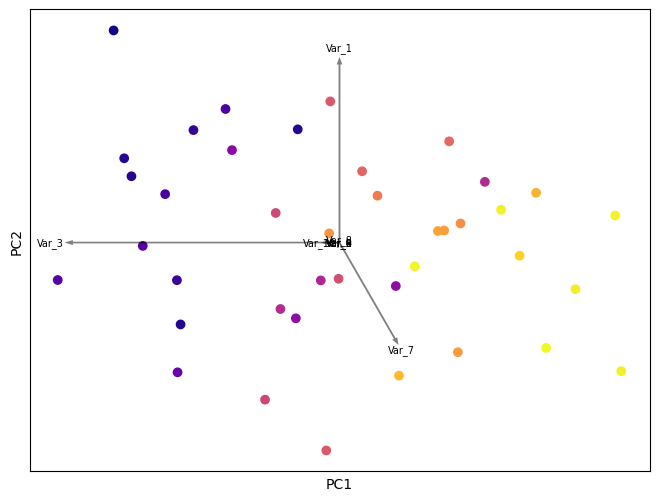

In [12]:
pca = auto_pca_cont.AutoPCA(data_reg,['dep_variable'], scale=False, sparse=True)
pca.biplot()
plt.show()

In [13]:
X = data_reg.drop('dep_variable', axis=1)
y = data_reg['dep_variable']

In [16]:
x = np.array(X)
x = pca.pca.transform(x)
x

c:\Users\ru59cuk\AppData\Local\anaconda3\envs\Omics_db\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SparsePCA was fitted with feature names
  warnings.warn(


array([[ 1.55866936,  0.27322093],
       [ 0.72558878, -0.62276168],
       [ 1.8724807 ,  0.86931036],
       [-0.53764662,  1.62199677],
       [ 0.29121662,  1.02104978],
       [-1.88086808,  1.61105857],
       [-2.04679041, -1.17303613],
       [-1.38430301,  1.32443436],
       [ 2.08119788,  0.46969502],
       [-0.01178392, -0.51878917],
       [-2.90912759,  3.0385099 ],
       [-2.0935615 , -0.53938386],
       [-2.67949802,  0.94959915],
       [-0.24101172, -0.54238421],
       [ 1.26764438,  0.16552031],
       [ 1.52457161, -1.57019827],
       [ 3.5511152 ,  0.3872651 ],
       [ 0.76619887, -1.90653401],
       [-0.56204213, -1.08513576],
       [ 2.6605538 , -1.50941777],
       [ 2.53240461,  0.71252226],
       [-2.2452173 ,  0.69354394],
       [-0.11804082,  2.02227892],
       [ 3.63049332, -1.84251266],
       [-1.46769274,  1.91336788],
       [ 0.48920087,  0.67153013],
       [-2.77307495,  1.20708996],
       [ 3.03993865, -0.66817043],
       [-2.53370455,